## Kernel PCA
1. Apply Kernel PCA for a dataset given in the url, build a classification model and plot the graph	


In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import pickle
from sklearn.metrics import classification_report

In [25]:
# Importing the dataset

dataset = pd.read_csv('Dataset/Social_Network_Ads.csv')
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [5]:
# split dataset into train test  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

x_train,x_cv,y_train,y_cv=train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [6]:
# Feature Scaling

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_cv = sc.transform(x_cv)

In [7]:
# Applying Kernel PCA

kpca = KernelPCA(n_components = 2, kernel = 'rbf')
x_train = kpca.fit_transform(x_train)
x_test = kpca.transform(x_test)
x_cv = kpca.transform(x_cv)

In [9]:
# create pickle file for test data

file =open("test_data/test.pickle",'wb')
pickle.dump(x_test,file)
pickle.dump(y_test,file)
file.close()

In [10]:
# Fitting Logistic Regression to the Training set

classifier = LogisticRegression(random_state = 0)
classifier = classifier.fit(x_train, y_train)

In [11]:
# Predicting the Test set results

y_pred = classifier.predict(x_cv)

In [12]:
# Making the Confusion Matrix

cm = confusion_matrix(y_cv, y_pred)
print(cm)

[[34  4]
 [ 5 21]]


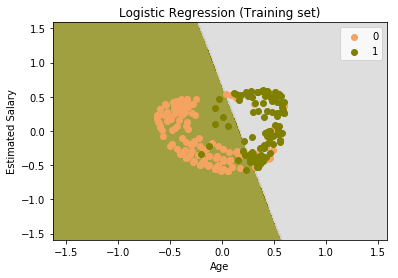

In [13]:
# Visualising the Training set results

X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('olive', 'lightgray')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('sandybrown', 'olive'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

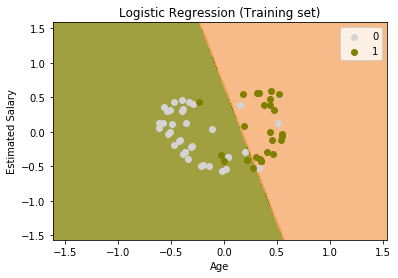

In [17]:
# Visualising the cv set results

X_set, y_set = x_cv, y_cv
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('olive', 'sandybrown')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightgray', 'olive'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [18]:
# Visualising the classification report

print("\n",classification_report(y_cv, y_pred))


              precision    recall  f1-score   support

          0       0.87      0.89      0.88        38
          1       0.84      0.81      0.82        26

avg / total       0.86      0.86      0.86        64



In [19]:
# save model in pickle file

file =open("Model_pickle/Model.pickle",'wb')
pickle.dump(classifier,file)
file.close()
print("Pickle file create: Model.pickle")

Pickle file create: Model.pickle
